In [67]:
from darts.ad.detectors.detectors import FittableDetector
from darts.ad.detectors.threshold_detector import ThresholdDetector
from darts.ad.detectors.quantile_detector import QuantileDetector
from darts.ad.anomaly_model.filtering_am import FilteringAnomalyModel
from darts.timeseries import TimeSeries
from darts.ad import KMeansScorer,PyODScorer,WassersteinScorer
import pandas as pd
import numpy as np
from pyod.models.abod import ABOD
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.pca import PCA
from pyod.models.anogan import AnoGAN


In [106]:

train = pd.read_csv("train.csv")
train['timestamp_(min)']=train['timestamp_(min)'].astype(int)

null_counts = train.isnull().sum()
print("Null counts per column:")
print(null_counts)

train=train.fillna(train.mean())

Null counts per column:
timestamp_(min)       0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4           202
feature_5           249
feature_6           563
feature_7            47
feature_8            47
feature_9             0
feature_10           47
feature_11            0
feature_12            0
feature_13          249
feature_14          202
feature_15            0
feature_16            0
feature_17            0
feature_18          202
feature_19            0
feature_20            0
feature_21         2136
feature_22          204
feature_23            0
feature_24           47
dtype: int64


In [107]:
train_time_series=TimeSeries.from_dataframe(train,time_col='timestamp_(min)',fill_missing_dates=True,freq=1,value_cols=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24'])

In [27]:
kmeansmodel=KMeansScorer(window=1,k=8,component_wise=False,diff_fn='abs_diff')
kmeansmodel.fit(train_time_series)
kscore=kmeansmodel.score(train_time_series)
print(kscore)

<TimeSeries (DataArray) (timestamp_(min): 132481, component: 1, sample: 1)>
array([[[0.30167055]],

       [[0.29196411]],

       [[0.30855698]],

       ...,

       [[0.19095425]],

       [[0.18644339]],

       [[0.18433703]]])
Coordinates:
  * timestamp_(min)  (timestamp_(min)) int64 0 1 2 3 ... 132478 132479 132480
  * component        (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


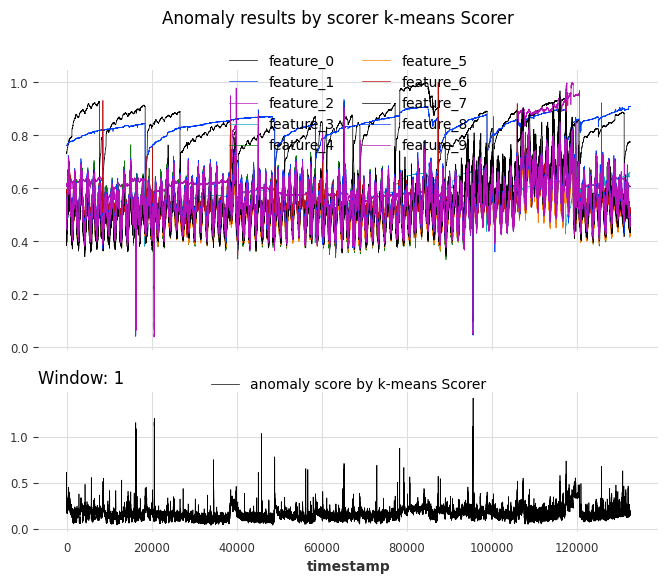

In [28]:
kmeansmodel.show_anomalies(series=train_time_series)

In [29]:
test = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_label.csv")
test=pd.merge(test,test_labels,on='timestamp_(min)')
test['timestamp_(min)']=test['timestamp_(min)'].astype(int)

null_counts = test.isnull().sum()
print("Null counts per column:")
print(null_counts)

test=test.fillna(test.mean())

Null counts per column:
timestamp_(min)    0
feature_0          0
feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_5          0
feature_6          0
feature_7          0
feature_8          0
feature_9          0
feature_10         0
feature_11         0
feature_12         0
feature_13         0
feature_14         0
feature_15         0
feature_16         0
feature_17         0
feature_18         0
feature_19         0
feature_20         0
feature_21         0
feature_22         0
feature_23         0
feature_24         0
label              0
dtype: int64


In [33]:
test_time_series=TimeSeries.from_dataframe(test,time_col='timestamp_(min)',fill_missing_dates=True,freq=1,value_cols=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24'])
actual_anomalies_time_series=TimeSeries.from_dataframe(test,time_col='timestamp_(min)',fill_missing_dates=True,freq=1,value_cols=['label'])
kmeansmodel.eval_accuracy(actual_anomalies=actual_anomalies_time_series,series=test_time_series,metric="AUC_ROC")

0.7129192192961838

In [108]:
automodel=AutoEncoder(hidden_neurons=[23, 23, 23, 23],hidden_activation='relu', output_activation='sigmoid', optimizer='adam', epochs=1, batch_size=32, dropout_rate=0.2, l2_regularizer=0.1, validation_size=0.1, preprocessing=True, verbose=1, random_state=None)
encoder=PyODScorer(automodel,window=1,component_wise=False,diff_fn='abs_diff')
encoder.fit(train_time_series)
encoderscore=encoder.score(train_time_series)
print(encoderscore)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 23)             │           598 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 25)             │           600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,154 (16.23 KB)

 Trainable params: 4,154 (16.23 KB)

 Non-trainable params: 0 (0.00 B)

None
3726/3726 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 12.1458 - val_loss: 1.6118
4141/4141 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4141/4141 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
<TimeSeries (DataArray) (timestamp_(min): 132481, component: 1, sample: 1)>
array([[[6.44771732]],

       [[6.30505715]],

       [[6.17634072]],

       ...,

       [[5.06084413]],

       [[5.16372195]],

       [[5.08047701]]])
Coordinates:
  * timestamp_(min)  (timestamp_(min)) int64 0 1 2 3 ... 132478 132479 132480
  * component        (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


4141/4141 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


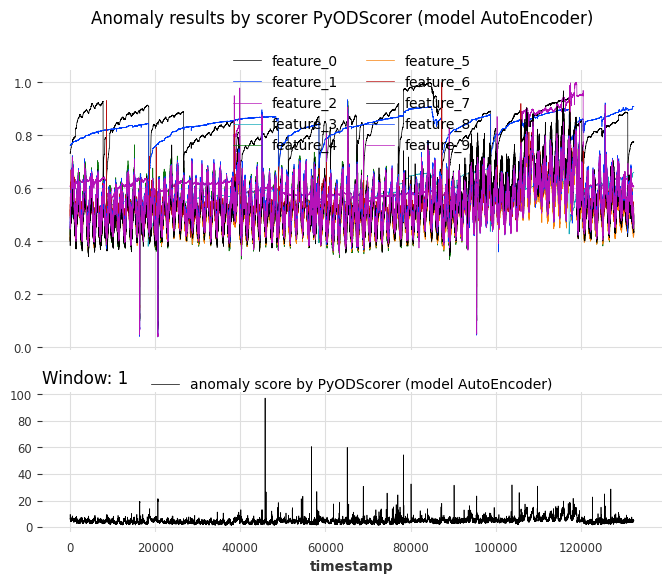

In [109]:
encoder.show_anomalies(series=train_time_series)

In [110]:
encoder.eval_accuracy(actual_anomalies=actual_anomalies_time_series,series=test_time_series,metric="AUC_ROC")

2746/2746 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


0.6577190570385332

In [44]:
pym=ABOD()
pymodel=PyODScorer(pym,window=1,component_wise=False,diff_fn='abs_diff')
pymodel.fit(train_time_series)
pyscore=pymodel.score(train_time_series)
print(pyscore)

<TimeSeries (DataArray) (timestamp_(min): 132481, component: 1, sample: 1)>
array([[[ -11070.55798721]],

       [[ -39793.42297261]],

       [[  -4231.31610968]],

       ...,

       [[-180526.15680982]],

       [[-194902.19762445]],

       [[ -22448.7075529 ]]])
Coordinates:
  * timestamp_(min)  (timestamp_(min)) int64 0 1 2 3 ... 132478 132479 132480
  * component        (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


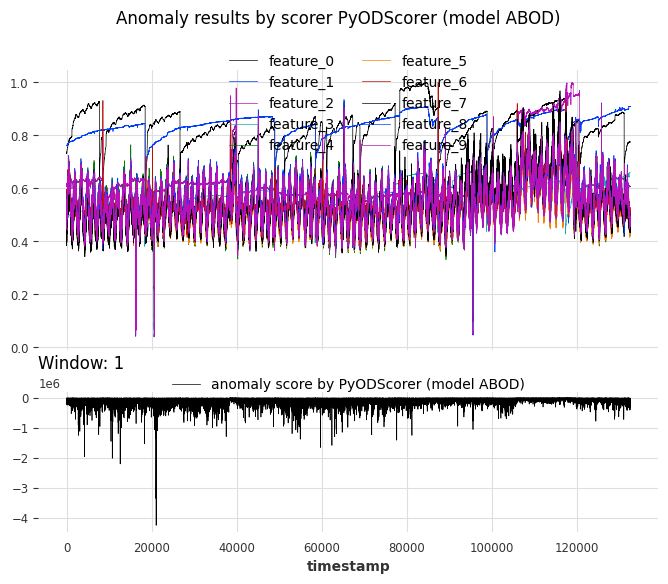

In [45]:
pymodel.show_anomalies(series=train_time_series)

In [46]:
pymodel.eval_accuracy(actual_anomalies=actual_anomalies_time_series,series=test_time_series,metric="AUC_ROC")

0.7102579561076277

In [72]:
PCAmodel=PCA()
pca=PyODScorer(PCAmodel,window=1,component_wise=False,diff_fn='abs_diff')
pca.fit(train_time_series)
pcascore=pca.score(train_time_series)
print(pcascore)

<TimeSeries (DataArray) (timestamp_(min): 132481, component: 1, sample: 1)>
array([[[215284.26264076]],

       [[210461.50200981]],

       [[206323.91192947]],

       ...,

       [[171867.4362248 ]],

       [[175080.01083702]],

       [[172560.26887618]]])
Coordinates:
  * timestamp_(min)  (timestamp_(min)) int64 0 1 2 3 ... 132478 132479 132480
  * component        (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


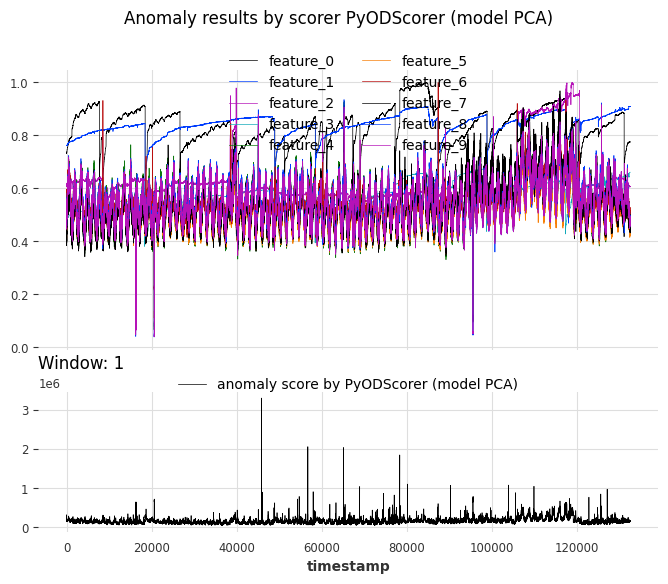

In [70]:
pca.show_anomalies(series=train_time_series)

In [73]:
pca.eval_accuracy(actual_anomalies=actual_anomalies_time_series,series=test_time_series,metric="AUC_ROC")

0.663702954229612

In [112]:
def generate_mask(N, d, lm, r):
    mask = np.zeros((N, d))
    state = 0  # Initial state
    for i in range(N):
        for j in range(d):
            p = np.random.uniform(0, 1)
            if state == 0:
                if p < (1 - 1/lm):
                    mask[i][j] = 0  
                else:
                    mask[i][j] = 1 
                    state = 1
            else:
                if p < (1 - 1/lm) * r / (1 - r):
                    mask[i][j] = 1
                else:
                    mask[i][j] = 0  
                    state = 0
    return mask


def augment_data(df, lm, r):
    N, d = df.shape[0], df.shape[1] - 1  # Excluding the 'time_step' column
    mask_1 = generate_mask(N, d, lm, r)
    mask_2 = generate_mask(N, d, lm, r)
    
    augmented_samples = []
    time_step_counter = df['timestamp_(min)'].max() + 1  # Start with the next time step after the existing ones
    
    for index, row in df.iterrows():
        row_data = row.values[1:]  # Exclude 'time_step' column
        augmented_row_1 = np.multiply(row_data, mask_1[index])
        augmented_row_2 = np.multiply(row_data, mask_2[index])
        
        augmented_samples.append(np.concatenate(([time_step_counter], augmented_row_1)))
        time_step_counter += 1  # Increment the time step counter
        augmented_samples.append(np.concatenate(([time_step_counter], augmented_row_2)))
        time_step_counter += 1  # Increment the time step counter

    augmented_df = pd.DataFrame(augmented_samples, columns=df.columns)
    return pd.concat([df, augmented_df], ignore_index=True)

# Example usage:
lm = 10  # Mean length of the mask segment
r = 0.9  # Masked proportion
df_augmented = augment_data(train, lm, r)
print(df_augmented)

        timestamp_(min)  feature_0  feature_1  feature_2  feature_3  \
0                   0.0   0.732689   0.761748   0.606848   0.488746   
1                   1.0   0.732799   0.761855   0.607133   0.488781   
2                   2.0   0.732938   0.761594   0.606895   0.488791   
3                   3.0   0.732893   0.761656   0.606478   0.488802   
4                   4.0   0.732788   0.761573   0.606777   0.488800   
...                 ...        ...        ...        ...        ...   
397438         397438.0   0.775367   0.909096   0.606409   0.660636   
397439         397439.0   0.775383   0.909189   0.606441   0.660613   
397440         397440.0   0.775383   0.909189   0.606441   0.660613   
397441         397441.0   0.775374   0.909185   0.606704   0.660626   
397442         397442.0   0.775374   0.909185   0.606704   0.660626   

        feature_4  feature_5  feature_6  feature_7  feature_8  ...  \
0        0.424310   0.403609   0.519318   0.398792   0.451453  ...   
1      

In [113]:
df_augmented['timestamp_(min)']=df_augmented['timestamp_(min)'].astype(int)


In [114]:
train_time_series=TimeSeries.from_dataframe(df_augmented,time_col='timestamp_(min)',fill_missing_dates=True,freq=1,value_cols=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24'])

In [115]:
PCAmodel=PCA()
pca=PyODScorer(PCAmodel,window=1,component_wise=False,diff_fn='abs_diff')
pca.fit(train_time_series)
pcascore=pca.score(train_time_series)
print(pcascore)

<TimeSeries (DataArray) (timestamp_(min): 397443, component: 1, sample: 1)>
array([[[215215.85745712]],

       [[210392.76413613]],

       [[206257.09492287]],

       ...,

       [[175027.38302608]],

       [[172507.72877763]],

       [[172507.72877763]]])
Coordinates:
  * timestamp_(min)  (timestamp_(min)) int64 0 1 2 3 ... 397440 397441 397442
  * component        (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [116]:
pca.eval_accuracy(actual_anomalies=actual_anomalies_time_series,series=test_time_series,metric="AUC_ROC")

0.6636879214442569

In [117]:
automodel=AutoEncoder(hidden_neurons=[23, 23, 23, 23],hidden_activation='relu', output_activation='sigmoid', optimizer='adam', epochs=10, batch_size=32, dropout_rate=0.2, l2_regularizer=0.1, validation_size=0.1, preprocessing=True, verbose=1, random_state=None)
encoder=PyODScorer(automodel,window=1,component_wise=False,diff_fn='abs_diff')
encoder.fit(train_time_series)
encoderscore=encoder.score(train_time_series)
print(encoderscore)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 23)             │           598 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 25)             │           600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,154 (16.23 KB)

 Trainable params: 4,154 (16.23 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 5.7429 - val_loss: 1.0304
Epoch 2/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 1.0063 - val_loss: 1.0179
Epoch 3/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9974 - val_loss: 1.0155
Epoch 4/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.9957 - val_loss: 1.0155
Epoch 5/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9971 - val_loss: 1.0155
Epoch 6/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 1.0012 - val_loss: 1.0155
Epoch 7/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.9931 - val_loss: 1.0155
Epoch 8/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.9995 - val_loss: 1.0155
Epoch 9/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.9938 - val_loss: 1.0155
Epoch 10/10
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9997 - val_loss: 1.0155
12421/12421 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
12421/12421 ━━━━━━━━━━━━━━━━━━━━ 16s 1

12421/12421 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step


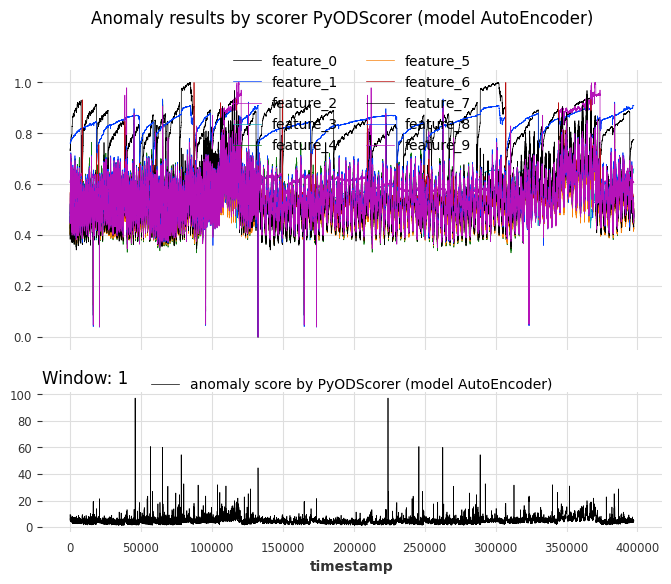

In [118]:
encoder.show_anomalies(series=train_time_series)

In [119]:
encoder.eval_accuracy(actual_anomalies=actual_anomalies_time_series,series=test_time_series,metric="AUC_ROC")

2746/2746 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


0.6634558449432985

In [122]:
import tensorflow as tf

def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)


In [124]:
automodel=AutoEncoder(hidden_neurons=[23, 23, 23, 23],hidden_activation='relu', output_activation='sigmoid', optimizer='adam',loss=contrastive_loss,epochs=1, batch_size=32, dropout_rate=0.2, l2_regularizer=0.1, validation_size=0.1, preprocessing=True, verbose=1, random_state=None)
encoder=PyODScorer(automodel,window=1,component_wise=False,diff_fn='abs_diff')
encoder.fit(train_time_series)
encoderscore=encoder.score(train_time_series)
print(encoderscore)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 23)             │           598 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 25)             │           600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,154 (16.23 KB)

 Trainable params: 4,154 (16.23 KB)

 Non-trainable params: 0 (0.00 B)

None
11179/11179 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 6.2781 - val_loss: 0.9925
12421/12421 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
12421/12421 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
<TimeSeries (DataArray) (timestamp_(min): 397443, component: 1, sample: 1)>
array([[[6.3208802 ]],

       [[6.17677657]],

       [[6.05269045]],

       ...,

       [[5.09025689]],

       [[5.012588  ]],

       [[5.012588  ]]])
Coordinates:
  * timestamp_(min)  (timestamp_(min)) int64 0 1 2 3 ... 397440 397441 397442
  * component        (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [125]:
encoder.eval_accuracy(actual_anomalies=actual_anomalies_time_series,series=test_time_series,metric="AUC_ROC")

2746/2746 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


0.6614931606352681